<a href="https://colab.research.google.com/github/ktkc/ai-science-training-series/blob/main/Copy_of_02_keras_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 dataset classification with CNNs

Author: Tanwi Mallick, adapting codes from Bethany Lusch, Prasanna Balprakash, Corey Adams, and Kyle Felker

In this notebook, we'll continue the CIFAR-10 problem using the Keras API (as included in the TensorFlow library) and incorporating convolutional layers.

First, the needed imports.

In [1]:
%matplotlib inline

import tensorflow as tf

import numpy
import matplotlib.pyplot as plt
import time

## CIFAR-10 data set

Again we'll load the cifar10 data set. CIFAR-10 dataset contains 32x32 color images from 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. If you haven't downloaded it already, it could take a while.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

170498071/170498071 [==============================] - 14s 0us/step


This time we won't flatten the images. 

The training data (`X_train`) is a 3rd-order tensor of size (50000, 32, 32), i.e. it consists of 50000 images of size 28x28 pixels. 

`y_train` is a 50000-dimensional vector containing the correct classes ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck') for each training sample.

## Convolutional neural network (CNN)

CNN is a type of deep learning model for processing data that has a grid pattern, such as images.

Let's use a small model that includes convolutional layers

- The Conv2D layers operate on 2D matrices so we input the digit images directly to the model.
    - The two Conv2D layers belows learn 32 and 64 filters respectively. 
    - They are learning filters for 3x3 windows.
- The MaxPooling2D layer reduces the spatial dimensions, that is, makes the image smaller.
    - It downsamples by taking the maximum value in the window 
    - The pool size of (2, 2) below means the windows are 2x2. 
    - Helps in extracting important features and reduce computation
- The Flatten layer flattens the 2D matrices into vectors, so we can then switch to Dense layers as in the MLP model.

See https://keras.io/layers/convolutional/, https://keras.io/layers/pooling/ for more information.

![conv layer](https://github.com/ktkc/ai-science-training-series/blob/main/03_neural_networks_tensorflow/images/conv_layer.png?raw=1)
Image credit: [Jason Brownlee](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)

![conv layer](https://github.com/ktkc/ai-science-training-series/blob/main/03_neural_networks_tensorflow/images/conv.png?raw=1)
Image credit: [Anh H. Reynolds](https://anhreynolds.com/blogs/cnn.html)


<img src="https://github.com/ktkc/ai-science-training-series/blob/main/03_neural_networks_tensorflow/images/MaxpoolSample2.png?raw=1" width="600" hight="600" align="left"/>

In [ ]:
class CIFAR10Classifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.conv_1 = tf.keras.layers.Conv2D(32, [3, 3], activation='relu')
        self.conv_2 = tf.keras.layers.Conv2D(64, [3, 3], activation='relu')
        self.pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop_4 = tf.keras.layers.Dropout(0.25)
        self.dense_5 = tf.keras.layers.Dense(128, activation='relu')
        self.drop_6 = tf.keras.layers.Dropout(0.5)
        self.dense_7 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, inputs):

        x = self.conv_1(inputs)
        x = self.conv_2(x)
        x = self.pool_3(x)
        x = self.drop_4(x)
        x = tf.keras.layers.Flatten()(x)
        x = self.dense_5(x)
        x = self.drop_6(x)
        x = self.dense_7(x)

        return x

### Simple training

Here is a concise way to train the network, like we did in the previous notebook. We'll see a more verbose approach below that allows more performance tuning.

In [ ]:
def train_network_concise(_batch_size, _n_training_epochs, _lr):

    cnn_model = CIFAR10Classifier()

    cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    
    history = cnn_model.fit(x_train, y_train, batch_size=_batch_size, epochs=_n_training_epochs)
    return history, cnn_model

In [ ]:
# This took 55 seconds per epoch on my laptop
batch_size = 512
epochs = 3
lr = .01
history, cnn_model = train_network_concise(batch_size, epochs, lr)

Epoch 1/3
98/98 [==============================] - 11s 35ms/step - loss: 1.9292 - accuracy: 0.2876
Epoch 2/3
98/98 [==============================] - 3s 32ms/step - loss: 1.5865 - accuracy: 0.4223
Epoch 3/3
98/98 [==============================] - 4s 38ms/step - loss: 1.4625 - accuracy: 0.4728


Accuracy for test data.  The model should be better than the non-convolutional model even if you're only patient enough for three epochs. 

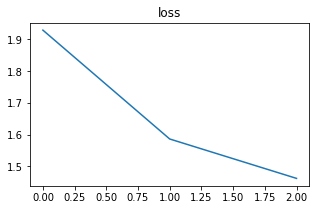

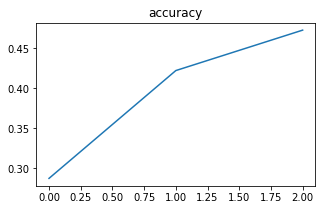

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

### Inference

With enough training epochs, the test accuracy should exceed 99%.

You can compare your result with the state-of-the art [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html). Even more results can be found [here](http://yann.lecun.com/exdb/mnist/).

In [ ]:
%%time
x_test_reshaped = numpy.expand_dims(x_test, -1)
scores = cnn_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

313/313 - 1s - loss: 1.2500 - accuracy: 0.5566 - 1s/epoch - 4ms/step
accuracy: 55.66%
CPU times: user 1.4 s, sys: 163 ms, total: 1.56 s
Wall time: 1.35 s


We can also again check the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix (rows: true classes; columns: predicted classes):'); print()
predictions = cnn_model.predict(x_test)
cm=confusion_matrix(y_test, numpy.argmax(predictions, axis=1), labels=list(range(10)))
print(cm); print()

print('Classification accuracy for each class:'); print()
for i,j in enumerate(cm.diagonal()/cm.sum(axis=1)): print("%d: %.4f" % (i,j))

Confusion matrix (rows: true classes; columns: predicted classes):

313/313 [==============================] - 1s 2ms/step
[[556  50  82  14  12  13  27  10 199  37]
 [ 20 755   3   9   3   4  26   7  64 109]
 [ 88  11 385  46 157 109 139  21  31  13]
 [ 11  19  99 276  70 228 221  30  21  25]
 [ 39  14 152  57 428  37 194  66  11   2]
 [ 12   6 113 133  63 494 103  53  18   5]
 [  4  13  46  36  56  16 802   7   7  13]
 [ 23   7  32  45  89 124  71 561   5  43]
 [104  76  22  10   2   7  20   4 713  42]
 [ 26 190   9  12   5   7  42  25  88 596]]

Classification accuracy for each class:

0: 0.5560
1: 0.7550
2: 0.3850
3: 0.2760
4: 0.4280
5: 0.4940
6: 0.8020
7: 0.5610
8: 0.7130
9: 0.5960


### More verbose training

This approach explicitly handles the looping over data. It will be helpful this afternoon for diving in and optimizing

In [ ]:
def compute_loss(y_true, y_pred):
    # if labels are integers, use sparse categorical crossentropy
    # network's final layer is softmax, so from_logtis=False
    scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    # if labels are one-hot encoded, use standard crossentropy

    return scce(y_true, y_pred)  

In [ ]:
def forward_pass(model, batch_data, y_true):
    y_pred = model(batch_data)
    loss = compute_loss(y_true, y_pred)
    return loss

In [ ]:
# Here is a function that will manage the training loop for us:

def train_loop(batch_size, n_training_epochs, model, opt):
    
    @tf.function()
    def train_iteration(data, y_true, model, opt):
        with tf.GradientTape() as tape:
            loss = forward_pass(model, data, y_true)

        trainable_vars = model.trainable_variables

        # Apply the update to the network (one at a time):
        grads = tape.gradient(loss, trainable_vars)

        opt.apply_gradients(zip(grads, trainable_vars))
        return loss

    for i_epoch in range(n_training_epochs):
        print("beginning epoch %d" % i_epoch)
        start = time.time()

        epoch_steps = int(50000/batch_size)
        dataset.shuffle(50000) # Shuffle the whole dataset in memory
        batches = dataset.batch(batch_size=batch_size, drop_remainder=True)
        
        for i_batch, (batch_data, y_true) in enumerate(batches):
            batch_data = tf.reshape(batch_data, [-1, 32, 32, 3])
            loss = train_iteration(batch_data, y_true, model, opt)
            
        end = time.time()
        print("took %1.1f seconds for epoch #%d" % (end-start, i_epoch))

In [ ]:
def train_network(_batch_size, _n_training_epochs, _lr):

    mnist_model = CIFAR10Classifier()

    opt = tf.keras.optimizers.Adam(_lr)

    train_loop(_batch_size, _n_training_epochs, mnist_model, opt)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset.shuffle(50000)

batch_size = 512
epochs = 3
lr = .01
train_network(batch_size, epochs, lr)

beginning epoch 0
took 3.5 seconds for epoch #0
beginning epoch 1
took 2.8 seconds for epoch #1
beginning epoch 2
took 2.8 seconds for epoch #2


# Homework: improve the accuracy of this model

Update this notebook to ensure more accuracy. How high can it be raised? Changes like increasing the number of epochs, altering the learning weight, altering the number of neurons the hidden layer, chnaging the optimizer, etc. could be made directly in the notebook. You can also change the model specification by expanding the network's layer. The current notebook's training accuracy is roughly 58.69%, although it varies randomly.

Starting with modifying the Simple Version first. 

In [ ]:
class CIFAR10Classifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.conv_1 = tf.keras.layers.Conv2D(32, [3, 3], activation='relu')
        self.conv_2 = tf.keras.layers.Conv2D(64, [3, 3], activation='relu')
        self.pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop_4 = tf.keras.layers.Dropout(0.25)
        #self.dense_5 = tf.keras.layers.Dense(128, activation='relu')
        self.dense_5 = tf.keras.layers.Dense(10)
        self.dense_6 = tf.keras.layers.LeakyReLU()
        self.drop_7 = tf.keras.layers.Dropout(0.5)
        self.dense_8 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, inputs):

        x = self.conv_1(inputs)
        x = self.conv_2(x)
        x = self.pool_3(x)
        x = self.drop_4(x)
        x = tf.keras.layers.Flatten()(x)
        x = self.dense_5(x)
        x = self.dense_6(x)
        x = self.drop_7(x)
        x = self.dense_8(x)

        return x

In [ ]:
def train_network_concise(_batch_size, _n_training_epochs, _lr):

    cnn_model = CIFAR10Classifier()

    cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    
    history = cnn_model.fit(x_train, y_train, batch_size=_batch_size, epochs=_n_training_epochs)
    return history, cnn_model

In [ ]:

batch_size = 50
epochs = 1000 #3000 not really worth the time; only got to 67.68% on the test set
#I need to be able to shuffle the data...
lr = .1
history, cnn_model = train_network_concise(batch_size, epochs, lr)

Streaming output truncated to the last 5000 lines.
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7348 - accuracy: 0.6985
Epoch 502/3000
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7419 - accuracy: 0.6962
Epoch 503/3000
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7369 - accuracy: 0.6976
Epoch 504/3000
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7445 - accuracy: 0.6948
Epoch 505/3000
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7408 - accuracy: 0.6990
Epoch 506/3000
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7382 - accuracy: 0.7007
Epoch 507/3000
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7410 - accuracy: 0.6960
Epoch 508/3000
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7415 - accuracy: 0.6981
Epoch 509/3000
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7428 - accuracy: 0.6961
Epoch 510/

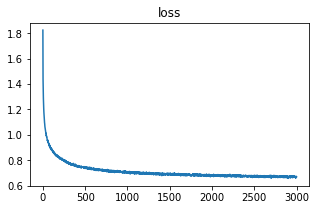

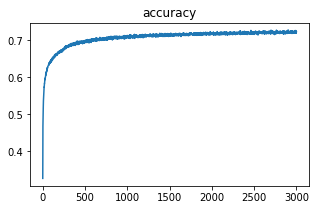

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

In [ ]:
%%time
x_test_reshaped = numpy.expand_dims(x_test, -1)
scores = cnn_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

313/313 - 1s - loss: 1.2599 - accuracy: 0.6768 - 950ms/epoch - 3ms/step
accuracy: 67.68%
CPU times: user 1.23 s, sys: 190 ms, total: 1.42 s
Wall time: 1.61 s


In [ ]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix (rows: true classes; columns: predicted classes):'); print()
predictions = cnn_model.predict(x_test)
cm=confusion_matrix(y_test, numpy.argmax(predictions, axis=1), labels=list(range(10)))
print(cm); print()

print('Classification accuracy for each class:'); print()
for i,j in enumerate(cm.diagonal()/cm.sum(axis=1)): print("%d: %.4f" % (i,j))

Confusion matrix (rows: true classes; columns: predicted classes):

313/313 [==============================] - 1s 2ms/step
[[768  21  62  18  24   4   6  11  70  16]
 [ 31 829  11   8   2   2   7   7  32  71]
 [ 87   6 566  75 109  42  77  25   8   5]
 [ 27  10  89 473  84 156  94  37  15  15]
 [ 27   3  76  59 634  32  54 103  12   0]
 [ 10   4  62 225  51 537  34  62   9   6]
 [ 11  11  52  46  61  28 778   6   4   3]
 [ 10   2  67  42  88  56   4 717   2  12]
 [161  30  12  17   6   8   7   4 733  22]
 [ 31 127   9  17   9   8   8  13  45 733]]

Classification accuracy for each class:

0: 0.7680
1: 0.8290
2: 0.5660
3: 0.4730
4: 0.6340
5: 0.5370
6: 0.7780
7: 0.7170
8: 0.7330
9: 0.7330


Now trying with the "More Verbose Training":

In [ ]:
def compute_loss(y_true, y_pred):
    # if labels are integers, use sparse categorical crossentropy
    # network's final layer is softmax, so from_logtis=False
    scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    # if labels are one-hot encoded, use standard crossentropy

    return scce(y_true, y_pred)  

In [ ]:
def forward_pass(model, batch_data, y_true):
    y_pred = model(batch_data)
    loss = compute_loss(y_true, y_pred)
    return loss

In [ ]:
# Here is a function that will manage the training loop for us:

def train_loop(batch_size, n_training_epochs, model, opt):
    
    @tf.function()
    def train_iteration(data, y_true, model, opt):
        with tf.GradientTape() as tape:
            loss = forward_pass(model, data, y_true)

        trainable_vars = model.trainable_variables

        # Apply the update to the network (one at a time):
        grads = tape.gradient(loss, trainable_vars)

        opt.apply_gradients(zip(grads, trainable_vars))
        return loss

    for i_epoch in range(n_training_epochs):
        print("beginning epoch %d" % i_epoch)
        start = time.time()

        epoch_steps = int(50000/batch_size)
        dataset.shuffle(50000) # Shuffle the whole dataset in memory
        batches = dataset.batch(batch_size=batch_size, drop_remainder=True)
        
        for i_batch, (batch_data, y_true) in enumerate(batches):
            batch_data = tf.reshape(batch_data, [-1, 32, 32, 3])
            loss = train_iteration(batch_data, y_true, model, opt)
            
        end = time.time()
        print("took %1.1f seconds for epoch #%d" % (end-start, i_epoch))

In [ ]:
def train_network(_batch_size, _n_training_epochs, _lr):

    mnist_model = CIFAR10Classifier()

    opt = tf.keras.optimizers.Adam(_lr)

    train_loop(_batch_size, _n_training_epochs, mnist_model, opt)
    #the compile step is probably off...I'm just not sure what to do to generate the history...
    mnist_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    

    history = mnist_model.fit(x_train, y_train, batch_size=_batch_size, epochs=_n_training_epochs)
    return history, cnn_model

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset.shuffle(50000)

batch_size = 50
epochs = 1000
lr = .1
history, new_cnn = train_network(batch_size, epochs, lr)

beginning epoch 0
took 4.5 seconds for epoch #0
beginning epoch 1
took 4.1 seconds for epoch #1
beginning epoch 2
took 4.0 seconds for epoch #2
beginning epoch 3
took 4.0 seconds for epoch #3
beginning epoch 4
took 4.2 seconds for epoch #4
beginning epoch 5
took 5.4 seconds for epoch #5
beginning epoch 6
took 5.5 seconds for epoch #6
beginning epoch 7
took 5.1 seconds for epoch #7
beginning epoch 8
took 5.1 seconds for epoch #8
beginning epoch 9
took 4.4 seconds for epoch #9
beginning epoch 10
took 4.1 seconds for epoch #10
beginning epoch 11
took 4.1 seconds for epoch #11
beginning epoch 12
took 4.0 seconds for epoch #12
beginning epoch 13
took 4.0 seconds for epoch #13
beginning epoch 14
took 4.0 seconds for epoch #14
beginning epoch 15
took 4.0 seconds for epoch #15
beginning epoch 16
took 4.0 seconds for epoch #16
beginning epoch 17
took 4.0 seconds for epoch #17
beginning epoch 18
took 4.0 seconds for epoch #18
beginning epoch 19
took 4.0 seconds for epoch #19
beginning epoch 20
t

Need to figure out how to look at accuracy, plots etc.

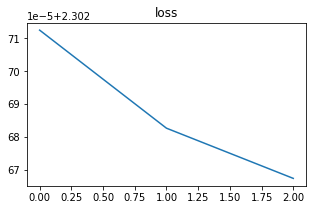

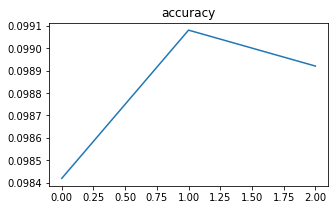

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

In [ ]:
%%time
x_test_reshaped = numpy.expand_dims(x_test, -1)
scores = cnn_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

313/313 - 1s - loss: 1.2599 - accuracy: 0.6768 - 853ms/epoch - 3ms/step
accuracy: 67.68%
CPU times: user 1.14 s, sys: 109 ms, total: 1.25 s
Wall time: 1.45 s


In [ ]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix (rows: true classes; columns: predicted classes):'); print()
predictions = cnn_model.predict(x_test)
cm=confusion_matrix(y_test, numpy.argmax(predictions, axis=1), labels=list(range(10)))
print(cm); print()

print('Classification accuracy for each class:'); print()
for i,j in enumerate(cm.diagonal()/cm.sum(axis=1)): print("%d: %.4f" % (i,j))

Confusion matrix (rows: true classes; columns: predicted classes):

313/313 [==============================] - 1s 2ms/step
[[768  21  62  18  24   4   6  11  70  16]
 [ 31 829  11   8   2   2   7   7  32  71]
 [ 87   6 566  75 109  42  77  25   8   5]
 [ 27  10  89 473  84 156  94  37  15  15]
 [ 27   3  76  59 634  32  54 103  12   0]
 [ 10   4  62 225  51 537  34  62   9   6]
 [ 11  11  52  46  61  28 778   6   4   3]
 [ 10   2  67  42  88  56   4 717   2  12]
 [161  30  12  17   6   8   7   4 733  22]
 [ 31 127   9  17   9   8   8  13  45 733]]

Classification accuracy for each class:

0: 0.7680
1: 0.8290
2: 0.5660
3: 0.4730
4: 0.6340
5: 0.5370
6: 0.7780
7: 0.7170
8: 0.7330
9: 0.7330
